- https://scikit-learn.org/stable/modules/tree.html
- http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [1]:
import sklearn

sklearn.__version__

'0.22.1'

In [2]:
!pip3 install scikit-learn --upgrade

    100% |████████████████████████████████| 7.1MB 7.3MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/2f/5b/2cc2b9285e8b2ca8d2c1e4a2cbf1b12d70a2488ea78170de1909bca725f2/numpy-1.18.1-cp37-cp37m-macosx_10_9_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/85/7a/ae480be23b768910a9327c33517ced4623ba88dc035f9ce0206657c353a9/scipy-1.4.1-cp37-cp37m-macosx_10_6_intel.whl
    100% |████████████████████████████████| 296kB 28.6MB/s ta 0:00:01
Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy'
Consider using the `--user` option or check the permissions.

You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [4]:
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['font.size'] = 14

In [5]:
x = np.linspace(0, 2* np.pi, 100)
y = np.sin(x) + .5*np.random.random(100)

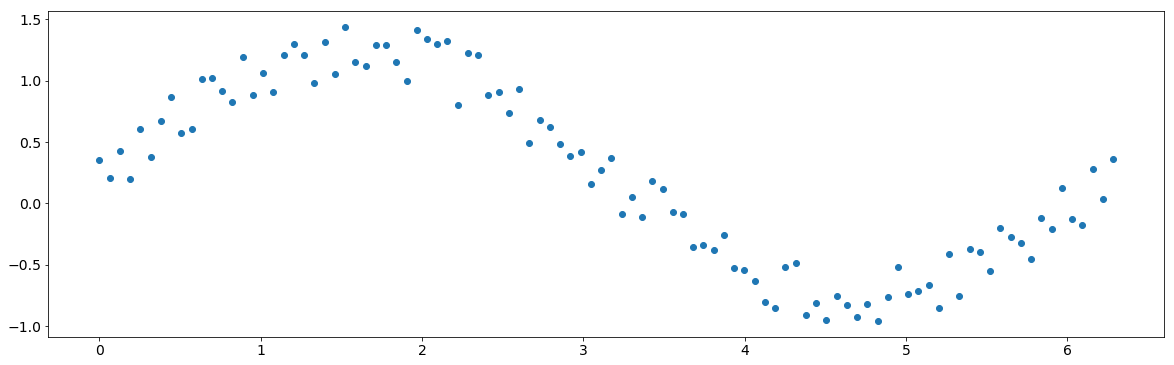

In [6]:
plt.scatter(x, y)

In [7]:
from sklearn import tree

In [8]:
2**16

65536

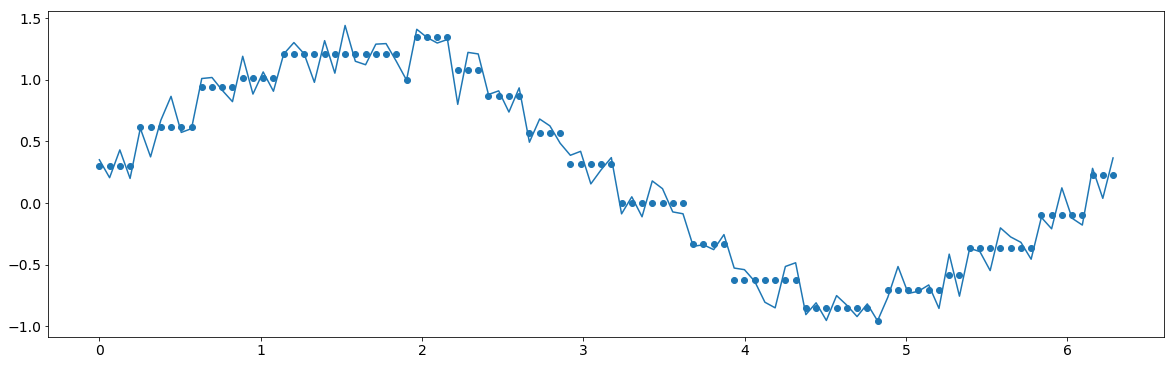

In [9]:
regression = tree.DecisionTreeRegressor(max_depth=8, min_samples_split=8)
regression.fit(x.reshape(-1, 1), y)

yp = regression.predict(x.reshape(-1,1))

plt.scatter(x, yp)
plt.plot(x, y)

In [10]:
regression.predict([[2]])

array([1.34292252])

In [11]:
path = regression.decision_path(x.reshape(-1, 1))

In [12]:
path.todense()

matrix([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 1, 0, 1],
        [1, 0, 0, ..., 1, 0, 1],
        [1, 0, 0, ..., 1, 0, 1]])

[Text(614.976,314.651,'X[0] <= 3.205\nmse = 0.539\nsamples = 100\nvalue = 0.237'),
 Text(347.595,277.633,'X[0] <= 2.634\nmse = 0.132\nsamples = 51\nvalue = 0.865'),
 Text(213.905,240.616,'X[0] <= 0.603\nmse = 0.106\nsamples = 42\nvalue = 0.958'),
 Text(106.952,203.598,'X[0] <= 0.222\nmse = 0.041\nsamples = 10\nvalue = 0.487'),
 Text(53.4762,166.58,'mse = 0.01\nsamples = 4\nvalue = 0.296'),
 Text(160.429,166.58,'mse = 0.021\nsamples = 6\nvalue = 0.615'),
 Text(320.857,203.598,'X[0] <= 2.38\nmse = 0.036\nsamples = 32\nvalue = 1.105'),
 Text(267.381,166.58,'X[0] <= 1.111\nmse = 0.031\nsamples = 28\nvalue = 1.139'),
 Text(160.429,129.562,'X[0] <= 0.857\nmse = 0.012\nsamples = 8\nvalue = 0.975'),
 Text(106.952,92.5444,'mse = 0.006\nsamples = 4\nvalue = 0.94'),
 Text(213.905,92.5444,'mse = 0.015\nsamples = 4\nvalue = 1.01'),
 Text(374.333,129.562,'X[0] <= 2.19\nmse = 0.024\nsamples = 20\nvalue = 1.205'),
 Text(320.857,92.5444,'X[0] <= 1.936\nmse = 0.017\nsamples = 17\nvalue = 1.227'),
 Text(

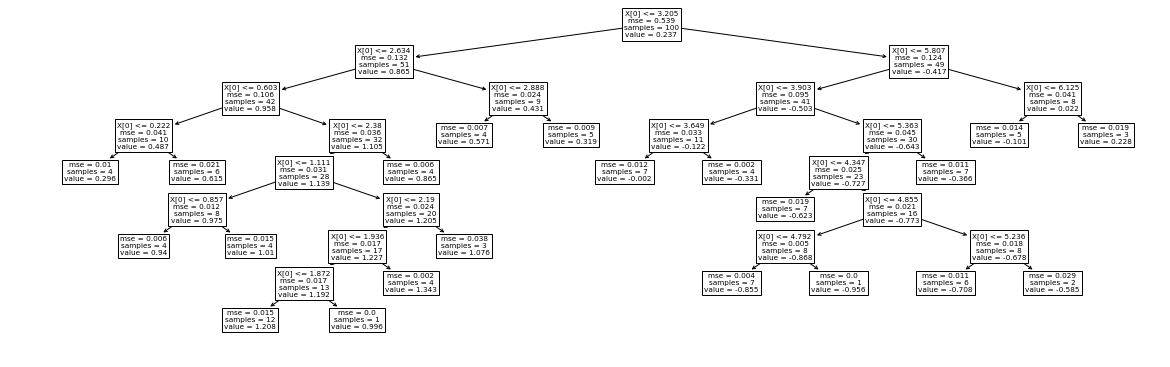

In [13]:
tree.plot_tree(regression)

In [14]:
bikeshare = pd.read_csv('../data/bikeshare_daily_agg.csv', index_col='hour_of_day')

In [15]:
bikeshare

,0,1,2,3,4,5,6
hour_of_day,,,,,,,
0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...
23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0


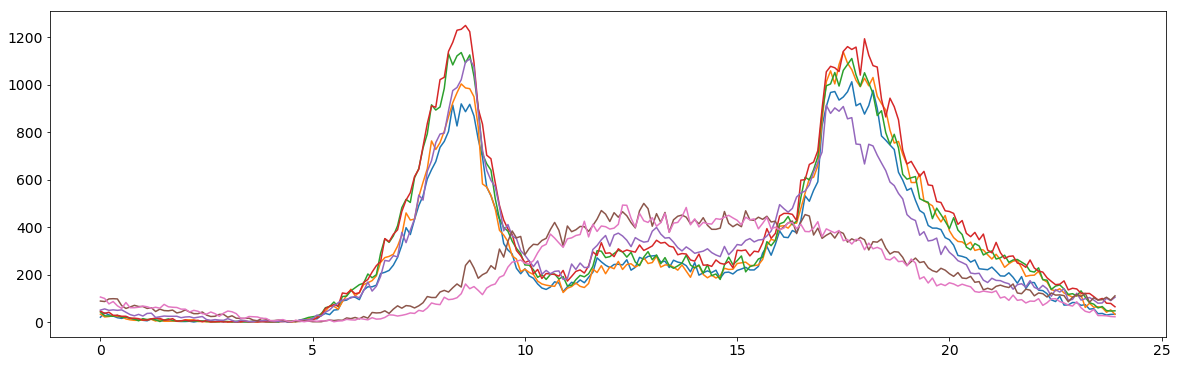

In [16]:
plt.plot(bikeshare)

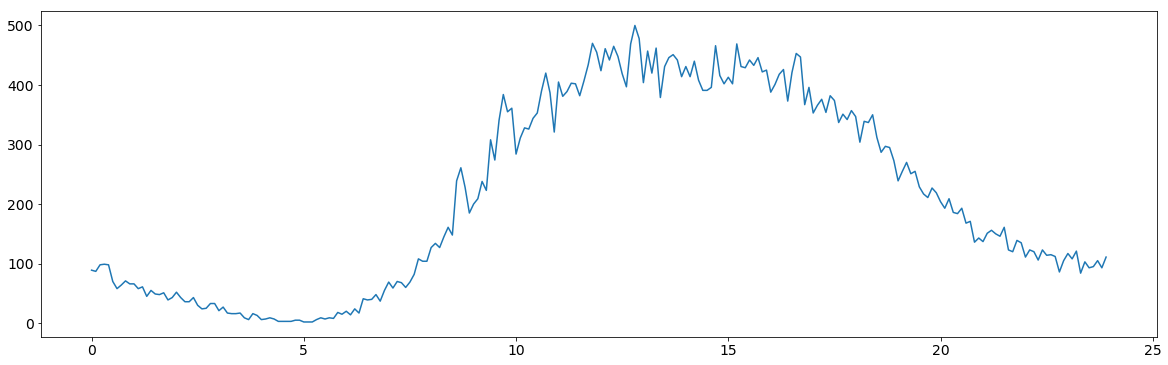

In [17]:
plt.plot(bikeshare['5'])

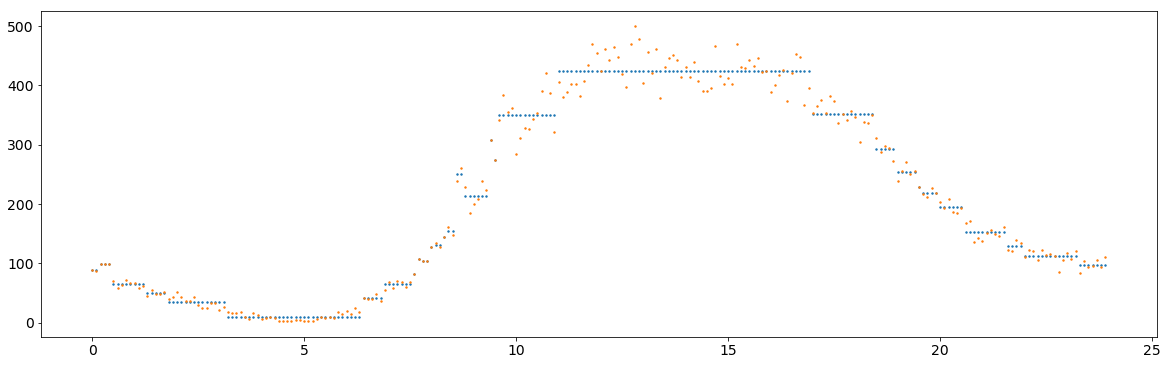

In [18]:
hours = bikeshare.index.values.reshape(-1,1)

bike_reg = tree.DecisionTreeRegressor(max_depth=5)
bike_reg.fit(hours, bikeshare['5'].fillna(0))

bike_pred = bike_reg.predict(hours)

plt.scatter(hours, bike_pred, s=2)
plt.scatter(hours, bikeshare['5'], s=2)

# Use the bikeshare dataset (see above) and choose a weekday (0,1,2,3,4).

# 1. Create 5 Decision Tree Regressors using `max_depth=4,5,6,7,8`. For each one of these models, calculate the MSE between the predicted values from the model (`bike_pred`) and the actual values (`bikeshare['n']`). Create a plot showing the predictions along with the actuals. You may also show the `print_tree()` for a sanity check as well.

# 2. Using the 5 models created with various `max_depth` values, calculate the MSE between the predicted values (`bike_pred`) and values from all of the weekdays [`0,1,2,3,4`]. You should have 25 total MSE values, 5 values for each `max_depth`. 

# 3. (2 cont'd) Describe which max_depth you would recommend based on the groups of MSE values. Use the idea of generality of the model for your argument along with the MSE values as proof.

No handles with labels found to put in legend.


(240, 2)
Total NaN vals: 0
For max_depth = 4: MSE = 10376.405722311105
For day = 0  MSE = 10376.41  and max_depth = 4 RMSE = 101.86
For day = 1  MSE = 14325.53  and max_depth = 4 RMSE = 119.69
For day = 2  MSE = 19741.58  and max_depth = 4 RMSE = 140.50
For day = 3  MSE = 28348.12  and max_depth = 4 RMSE = 168.37
For day = 4  MSE = 18790.31  and max_depth = 4 RMSE = 137.08
For max_depth = 5: MSE = 3904.3691496921188
For day = 0  MSE = 3904.37  and max_depth = 5 RMSE = 62.48
For day = 1  MSE = 7368.86  and max_depth = 5 RMSE = 85.84
For day = 2  MSE = 12060.61  and max_depth = 5 RMSE = 109.82
For day = 3  MSE = 19023.68  and max_depth = 5 RMSE = 137.93
For day = 4  MSE = 11164.04  and max_depth = 5 RMSE = 105.66
For max_depth = 6: MSE = 1682.6231752245399
For day = 0  MSE = 1682.62  and max_depth = 6 RMSE = 41.02
For day = 1  MSE = 4276.64  and max_depth = 6 RMSE = 65.40
For day = 2  MSE = 8153.59  and max_depth = 6 RMSE = 90.30
For day = 3  MSE = 14729.12  and max_depth = 6 RMSE = 121.

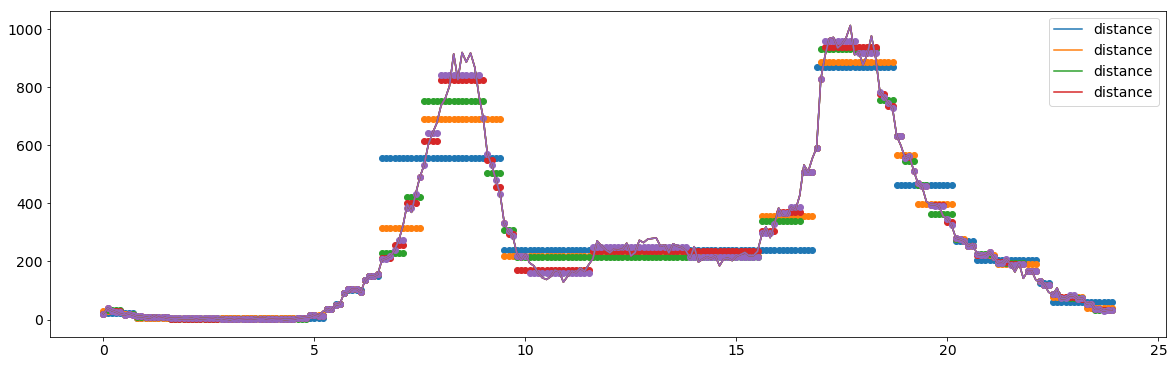

In [167]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# extract subset of bikeshare data for monday and organize the dataframe.
monday_data = bikeshare.loc[:,'0'].reset_index().fillna(0)
print(monday_data.shape)
monday_data.columns = ['hour','distance']

# peace of mind that theres no NaN values in the data set.
print('Total NaN vals: ' + str(monday_data.distance.isna().sum())) # verify the correction worked. 


# test and train data.
x_train, x_test, y_train, y_test = train_test_split(monday_data.hour, monday_data.distance, train_size = .8)


# iterate through 4:8 for max depth.
for i in range(4,9):
    
    # create model to answer Q1.
    regression = tree.DecisionTreeRegressor(max_depth=i)
    regression.fit(np.array(x_train).reshape(-1,1) , y_train)
    # predict values on model.
    pred_vals = regression.predict(np.array(monday_data.hour).reshape(-1,1))
    
    # plot graphs onto the original data.
    plt.scatter(monday_data.hour, pred_vals)
    plt.legend()
    plt.plot(monday_data.hour, monday_data.distance)
    mse = mean_squared_error(monday_data.distance, pred_vals)
    print('For max_depth = ' + str(i) + ": MSE = " + str(mse))
    
    for j in range(0,5):
        day_of_week = bikeshare.iloc[:,j].reset_index().fillna(0)
        #print(day_of_week)
        #print(day_of_week.iloc[:,1])
        mse_per_day = mean_squared_error(bikeshare.iloc[:,j].fillna(0), pred_vals)
        
        print(f'For day = {j}  MSE = {mse_per_day:0.2f}  and max_depth = {i} RMSE = {np.sqrt(mse_per_day):0.2f}')
    # run model against the other days of the week in the data set. 
    
        
        


For question 3,
I would suggest using a max_depth score of 8 since the avg RMSE is 67.59
while for max_depth = 7 mean RMSE is 71.91, max_depth = 6 mean RMSE is 82.47, max_depth = 5 mean RMSE is 100.35,
max_depth = 4 mean RMSE is 133.5